# 実機を使う

In [1]:
# pip install qiskit-ibm-runtime
from qiskit_ibm_runtime import QiskitRuntimeService

## (One time) アカウント情報の保存
quantum.ibm.com のトップページからトークンをコピーして、下に貼り付ける。

In [2]:
QiskitRuntimeService.save_account('1d1c9daedc419a4eca98250b7e6fcf30d2552c02d5e87e42054a453c316f7eb2cbd20d209d4dd360a32d40bff90b951db341491e46ba4e4f3c5b8afedfe1e178',
                                  channel='ibm_quantum')

## QiskitRuntimeServiceからバックエンドを取得する

In [3]:
service = QiskitRuntimeService(channel='ibm_quantum')

バックエンドのリストをダウンロードする（結構時間がかかる。あまりやる意味がない操作）

In [4]:
service.backends()

[<IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_kawasaki')>]

使えるインスタンスのリストをダウンロードする（同じくあまり意味のない操作）

In [5]:
service.instances()

['ibm-q-utokyo/internal/icepp-r5',
 'utokyo-kawasaki/internal/icepp-r5',
 'ibm-q/open/main']

特定のバックエンドを利用する

In [11]:
# インスタンスを指定しないとプライオリティの低いバックエンドが得られるかもしれない
backend = service.get_backend('ibm_kawasaki', instance='utokyo-kawasaki/internal/icepp-r5')

一番空いているバックエンドを利用する

In [8]:
# インスタンスを指定しないとopenのものが返ってくるかもしれない
backend = service.least_busy(
    simulator=False,
    filters=lambda b: b.name != 'ibm_oslo',
    instance='ibm-q-utokyo/internal/icepp-r5'
)

## 回路の実行

/Users/maeno0ta/single-particle-qft/.venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


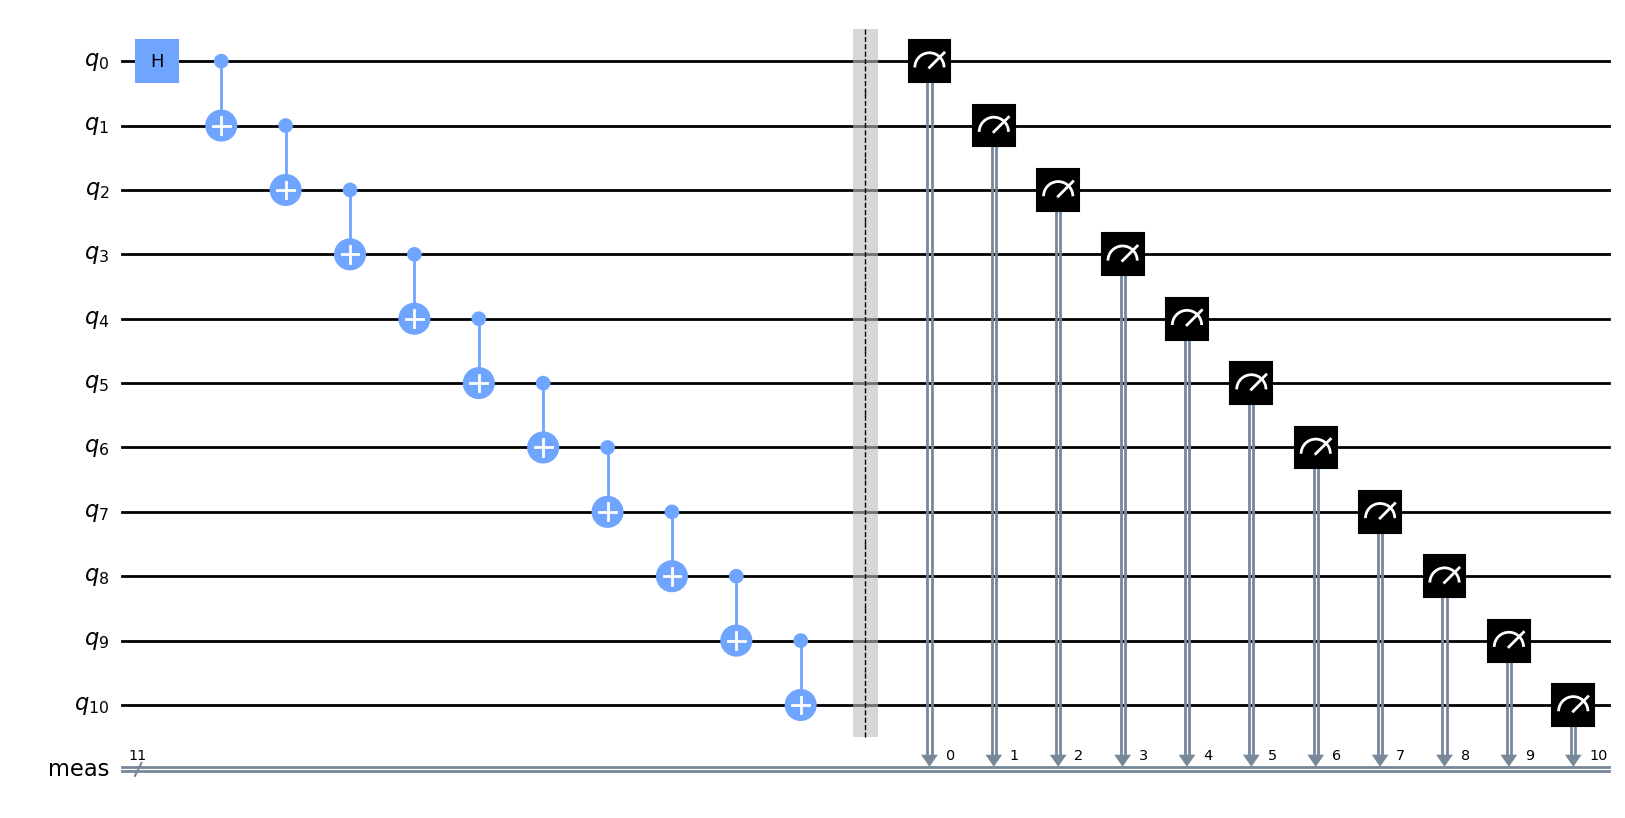

In [10]:
from qiskit import QuantumCircuit, transpile

# n-GHZ stateを作る回路のリスト
circuits = []
for num_qubits in range(2, 12):
    circuit = QuantumCircuit(num_qubits)
    circuit.h(0)
    for iq in range(num_qubits - 1):
        circuit.cx(iq, iq + 1)
    circuit.measure_all()
    circuits.append(circuit)

circuits[-1].draw('mpl')

「論理」回路をバックエンドが理解できる「物理」回路に変換する（transpile）。`transpile()`関数には回路を個別に渡してもいいし、リストごと渡してもいい

In [12]:
tcircuits = transpile(circuits, backend=backend, optimization_level=2)
tcircuits[-1].draw(idle_wires=False)

global phase: 7π/4
          ┌──────────┐┌────┐┌────────┐                                  »
q_10 -> 6 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
          ├──────────┤├────┤├────────┤                                  »
 q_9 -> 7 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
          └┬────────┬┘├────┤├────────┤                                  »
 q_8 -> 8 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
           ├────────┤ ├────┤├────────┤                                  »
q_7 -> 16 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
           ├────────┤ ├────┤├────────┤                                  »
q_4 -> 24 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
           ├────────┤ ├────┤├────────┤                                  »
q_5 -> 25 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
           ├────────┤ ├────┤├────────┤                                  »
q_6 -> 26 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
           ├────────┤ ├────┤├────────┤                                  »
q_3 -> 34 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├──────────────────────────────────»
          ┌┴────────┤ ├────┤└────────┘┌──────┐┌───┐                     »
q_0 -> 41 ┤ Rz(π/2) ├─┤ √X ├──────────┤0     ├┤ X ├─────────────────────»
          └┬────────┤ ├────┤┌────────┐│  Ecr │├───┴┐┌──────────┐┌──────┐»
q_1 -> 42 ─┤ Rz(-π) ├─┤ √X ├┤ Rz(-π) ├┤1     ├┤ √X ├┤ Rz(-π/2) ├┤1     ├»
          ┌┴────────┴┐├────┤├────────┤└──────┘└────┘└──────────┘│  Ecr │»
q_2 -> 43 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-π) ├──────────────────────────┤0     ├»
          └──────────┘└────┘└────────┘                          └──────┘»
 meas: 11/══════════════════════════════════════════════════════════════»
                                                                        »
«                                                                   »
«q_10 -> 6 ─────────────────────────────────────────────────────────»
«                                                                   »
« q_9 -> 7 ─────────────────────────────────────────────────────────»
«                                                                   »
« q_8 -> 8 ─────────────────────────────────────────────────────────»
«                                                                   »
«q_7 -> 16 ─────────────────────────────────────────────────────────»
«                                                           ┌──────┐»
«q_4 -> 24 ─────────────────────────────────────────────────┤1     ├»
«                                                           │      │»
«q_5 -> 25 ─────────────────────────────────────────────────┤      ├»
«                                                           │  Ecr │»
«q_6 -> 26 ─────────────────────────────────────────────────┤      ├»
«                                       ┌──────┐┌──────────┐│      │»
«q_3 -> 34 ─────────────────────────────┤1     ├┤ Rz(-π/2) ├┤0     ├»
«                                       │      │└──────────┘└──────┘»
«q_0 -> 41 ─────────────────────────────┤      ├────────────────────»
«          ┌──────────┐┌────┐┌─────────┐│  Ecr │                    »
«q_1 -> 42 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├┤      ├────────────────────»
«          ├─────────┬┘├────┤└─────────┘│      │   ┌───┐            »
«q_2 -> 43 ┤ Rz(π/2) ├─┤ √X ├───────────┤0     ├───┤ X ├────────────»
«          └─────────┘ └────┘           └──────┘   └───┘            »
« meas: 11/═════════════════════════════════════════════════════════»
«                                                                   »
«                                                                      »
«q_10 -> 6 ────────────────────────────────────────────────────────────»
«                                                                      »
« q_9 -> 7 ────────────────────────────────────────────────────────────»
«                                                                      »
« q_8 -> 8 ─────

バックエンドで実行する。backend.runも単独の回路と回路のリスト両方で呼べる。

In [13]:
job = backend.run(tcircuits, shots=1000)

上のセルはすぐに返るが、ジョブが実行されたということではない。結果を待つなら`job.result()`を呼ぶ。

In [15]:
result = job.result()
counts = result.get_counts()

countsの可視化は従来どおり

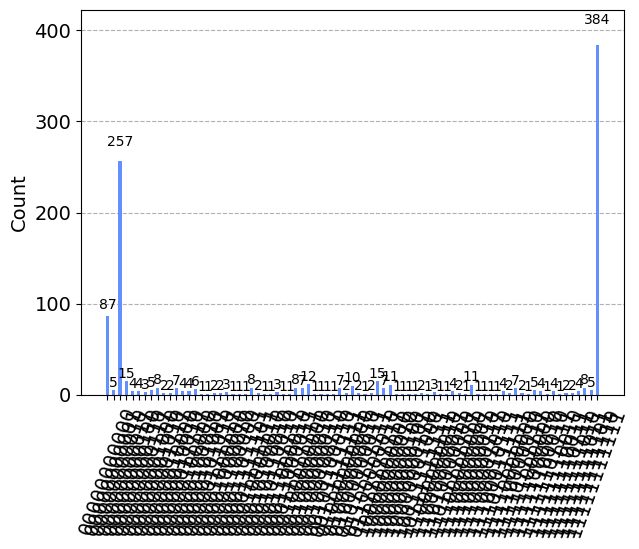

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(counts[-1])

## Sessionを使った実行

実は`backend.run()`もいずれ使えなくなる事になっていて、将来的にはすべてのジョブはRuntime Sessionというものを通じて投げることになる。セッションを使うと、一度ジョブが実行されると同一セッション中に5分以内の間隔で投げたジョブは即座に実行されるようになるので、VQEなど逐次計算をするときには必須。そうでなくても何かデバグしているときなどに便利。

In [17]:
from qiskit_ibm_runtime import Session

session = Session(backend=backend)

In [18]:
options = {'job_tags': ['anything', 'you', 'like']}
inputs = {'circuits': tcircuits, 'skip_transpilation': True, 'shots': 1000}
job = session.run('circuit-runner', inputs, options=options)

あとは上と同じ

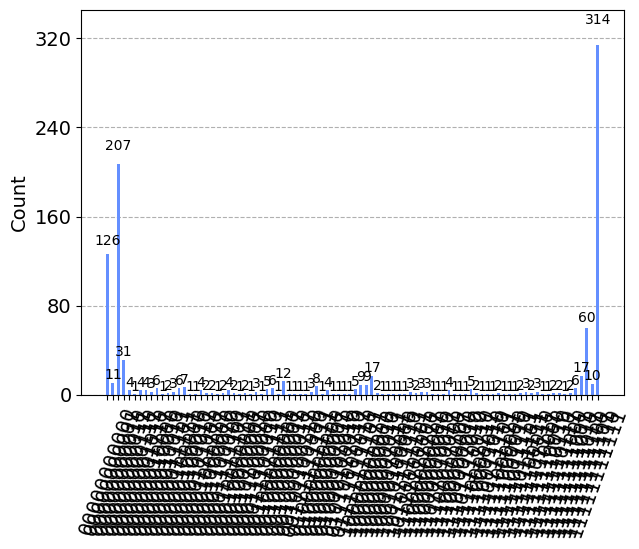

In [19]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts[-1])